In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wongs-planet/sample_submission.csv
/kaggle/input/wongs-planet/train.csv
/kaggle/input/wongs-planet/test.csv


In [3]:
train_data=pd.read_csv('/kaggle/input/wongs-planet/train.csv')
test_data=pd.read_csv('/kaggle/input/wongs-planet/test.csv')

In [4]:
train_data.head

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method NDFrame.head of         ID  Gravitational Flux  Dark Matter Density  Quantum Variance  \
0        0            0.411568           -13.761699          0.962127   
1        1            0.372928           -66.702856         -3.110865   
2        2            0.475778          -184.794916         -1.783947   
3        3           -0.569379          -260.749026         -1.582171   
4        4           -0.068484           572.566093          2.819685   
...    ...                 ...                  ...               ...   
5195  5195            0.644305           430.456276          5.761146   
5196  5196            0.088754         -1137.456730          2.018659   
5197  5197           -0.690228           -54.830020         -0.830245   
5198  5198            0.171852                  NaN         -6.118260   
5199  5199            0.280100           862.015045         -3.124128   

      Space-Time Curvature  Neutrino Activity  Hawking Radiation  \
0                 0.01898

In [5]:
train_data.shape

(5200, 38)

In [6]:
test_data.shape

(1300, 37)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              5200 non-null   int64  
 1   Gravitational Flux              5083 non-null   float64
 2   Dark Matter Density             4786 non-null   float64
 3   Quantum Variance                5127 non-null   float64
 4   Space-Time Curvature            5200 non-null   float64
 5   Neutrino Activity               5105 non-null   float64
 6   Hawking Radiation               5200 non-null   float64
 7   Magnetar Field Strength         5200 non-null   float64
 8   Cosmic Drift                    5200 non-null   float64
 9   Event Horizon Stability         5200 non-null   float64
 10  Tachyon Flux                    5105 non-null   float64
 11  Wormhole Entropy                5200 non-null   float64
 12  Dimensional Shift               52

In [8]:
train_data.isnull().sum()

ID                                   0
Gravitational Flux                 117
Dark Matter Density                414
Quantum Variance                    73
Space-Time Curvature                 0
Neutrino Activity                   95
Hawking Radiation                    0
Magnetar Field Strength              0
Cosmic Drift                         0
Event Horizon Stability              0
Tachyon Flux                        95
Wormhole Entropy                     0
Dimensional Shift                    0
Singularity Depth                   95
Photon Rebound Index                 0
Temporal Distortion                  0
Interstellar Wind Velocity         130
Gamma Ray Intensity                  0
Plasma Density                    2277
Quantum Foam Density                 0
Exotic Matter Stability             95
Zero-Point Energy Field              0
Multiverse Leakage                   0
Subspace Fluctuations                0
Entropy Gradient                     0
Black Hole Spin Factor   

In [9]:
train_data.duplicated().sum()

0

In [10]:
test_data.isnull().sum()

ID                                  0
Gravitational Flux                 22
Dark Matter Density               162
Quantum Variance                   11
Space-Time Curvature                0
Neutrino Activity                  39
Hawking Radiation                   0
Magnetar Field Strength             0
Cosmic Drift                        0
Event Horizon Stability             0
Tachyon Flux                       39
Wormhole Entropy                    0
Dimensional Shift                   0
Singularity Depth                  39
Photon Rebound Index                0
Temporal Distortion                 0
Interstellar Wind Velocity        106
Gamma Ray Intensity                 0
Plasma Density                    579
Quantum Foam Density                0
Exotic Matter Stability            39
Zero-Point Energy Field             0
Multiverse Leakage                  0
Subspace Fluctuations               0
Entropy Gradient                    0
Black Hole Spin Factor              0
Orbital Reso

In [11]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [12]:
for i in train_data.select_dtypes(include="number").columns:
    train_data[i]=impute.fit_transform(train_data[[i]])
for i in test_data.select_dtypes(include="number").columns:
    test_data[i]=impute.fit_transform(test_data[[i]])    

In [13]:
train_data.isnull().sum()

ID                                0
Gravitational Flux                0
Dark Matter Density               0
Quantum Variance                  0
Space-Time Curvature              0
Neutrino Activity                 0
Hawking Radiation                 0
Magnetar Field Strength           0
Cosmic Drift                      0
Event Horizon Stability           0
Tachyon Flux                      0
Wormhole Entropy                  0
Dimensional Shift                 0
Singularity Depth                 0
Photon Rebound Index              0
Temporal Distortion               0
Interstellar Wind Velocity        0
Gamma Ray Intensity               0
Plasma Density                    0
Quantum Foam Density              0
Exotic Matter Stability           0
Zero-Point Energy Field           0
Multiverse Leakage                0
Subspace Fluctuations             0
Entropy Gradient                  0
Black Hole Spin Factor            0
Orbital Resonance                 0
Quantum Superposition Streng

In [14]:
test_data.isnull().sum()

ID                                0
Gravitational Flux                0
Dark Matter Density               0
Quantum Variance                  0
Space-Time Curvature              0
Neutrino Activity                 0
Hawking Radiation                 0
Magnetar Field Strength           0
Cosmic Drift                      0
Event Horizon Stability           0
Tachyon Flux                      0
Wormhole Entropy                  0
Dimensional Shift                 0
Singularity Depth                 0
Photon Rebound Index              0
Temporal Distortion               0
Interstellar Wind Velocity        0
Gamma Ray Intensity               0
Plasma Density                    0
Quantum Foam Density              0
Exotic Matter Stability           0
Zero-Point Energy Field           0
Multiverse Leakage                0
Subspace Fluctuations             0
Entropy Gradient                  0
Black Hole Spin Factor            0
Orbital Resonance                 0
Quantum Superposition Streng

In [15]:
train_data['Wormhole Stability'] = train_data['Wormhole Stability'].map({'Fail': 0, 'Success': 1})
test_data['Wormhole Stability'] = train_data['Wormhole Stability'].map({'Fail': 0, 'Success': 1})

In [16]:
train_data.head

<bound method NDFrame.head of           ID  Gravitational Flux  Dark Matter Density  Quantum Variance  \
0        0.0            0.411568           -13.761699          0.962127   
1        1.0            0.372928           -66.702856         -3.110865   
2        2.0            0.475778          -184.794916         -1.783947   
3        3.0           -0.569379          -260.749026         -1.582171   
4        4.0           -0.068484           572.566093          2.819685   
...      ...                 ...                  ...               ...   
5195  5195.0            0.644305           430.456276          5.761146   
5196  5196.0            0.088754         -1137.456730          2.018659   
5197  5197.0           -0.690228           -54.830020         -0.830245   
5198  5198.0            0.171852           464.879103         -6.118260   
5199  5199.0            0.280100           862.015045         -3.124128   

      Space-Time Curvature  Neutrino Activity  Hawking Radiation  \
0

<Axes: >

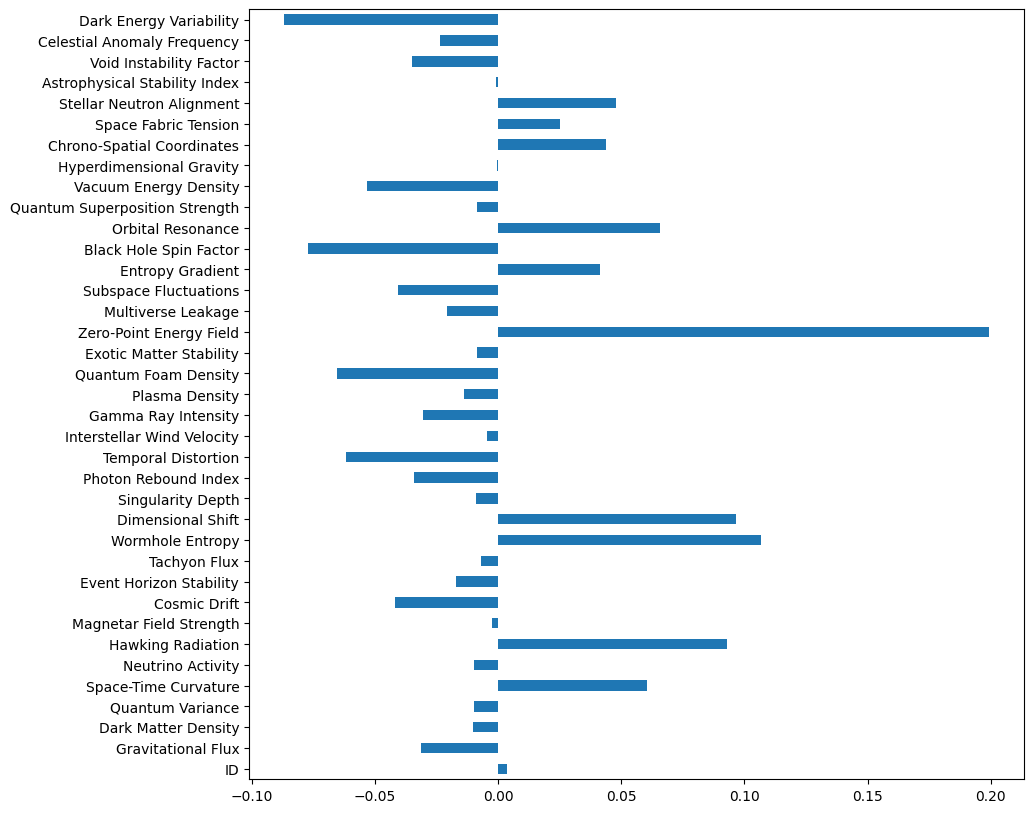

In [17]:
correlation_values = train_data.corr()['Wormhole Stability'].drop('Wormhole Stability')
correlation_values.plot(kind='barh', figsize=(10,10))

In [18]:
X_train=train_data.drop(columns=['Wormhole Stability','ID'])
y_train=train_data['Wormhole Stability']

In [19]:
X_test=test_data.drop(columns=['Wormhole Stability','ID'])

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [21]:
X_train_scaled.shape

(5200, 36)

In [22]:
import xgboost as xgb

In [23]:
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)

In [31]:
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',        # Log loss for binary classification
    'max_depth': 5,                  # Tree depth
    'learning_rate': 0.1,            # Learning rate
    'n_estimators': 100              # Number of boosting rounds
}

In [32]:
num_round = 100
model = xgb.train(params, dtrain, num_round)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:55:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [33]:
from sklearn.metrics import accuracy_score
y_pred_prob = model.predict(dtrain)  # Probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert to binary labels (0 or 1)

# Compute accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.87%


In [27]:
dtest = xgb.DMatrix(X_test_scaled)
y_sub = model.predict(dtest)  # Probabilities
y_sub = (y_sub > 0.5).astype(int)

In [28]:
y_sub

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
ids = np.arange(0, len(y_sub))

# Convert to DataFrame
df_predictions = pd.DataFrame({'ID': ids, 'Wormhole Stability': y_sub})

# Save to CSV
df_predictions.to_csv("predictions.csv", index=False)

print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv


In [30]:
df_predictions

,ID,Wormhole Stability
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1295,1295,0
1296,1296,0
1297,1297,0
1298,1298,0
